# Modeling Inductance in an RLC Circuit

In [2]:
import numpy as np
import scipy.optimize as opt
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
x = pd.read_csv("reference.csv")
x

,Time (microseconds),Voltage (mV)
0,-129.6,0.00
1,148.0,184.00
2,476.0,-132.00
3,796.0,100.00
4,1124.0,-72.00
5,1444.0,60.00
6,1764.0,-40.00
7,2092.0,36.00
8,2428.0,-16.00
9,2748.0,16.00


In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time (microseconds)  18 non-null     float64
 1   Voltage (mV)         18 non-null     float64
dtypes: float64(2)
memory usage: 420.0 bytes


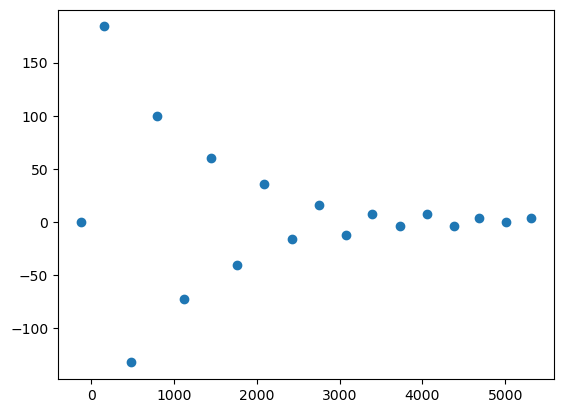

In [5]:
xdata = x['Time (microseconds)']
ydata = x['Voltage (mV)']

plt.scatter(xdata, ydata)

plt.show()

In [4]:
y = pd.read_csv("discharging.csv")
y

,Time (seconds),delta(V)
0,-1.780,0.40
1,-1.769,8.44
2,-1.765,7.96
3,-1.761,7.48
4,-1.753,6.52
5,-1.745,5.88
6,-1.732,5.24
7,-1.725,4.36
8,-1.713,3.64
9,-1.697,3.00


    Time (seconds)  delta(V)
1           -1.769      8.44
2           -1.765      7.96
3           -1.761      7.48
4           -1.753      6.52
5           -1.745      5.88
6           -1.732      5.24
7           -1.725      4.36
8           -1.713      3.64
9           -1.697      3.00
10          -1.681      2.36
11          -1.661      1.88
12          -1.605      1.00
13          -1.557      0.52
14          -1.501      0.28
15          -1.421      0.12
16          -1.277      0.04


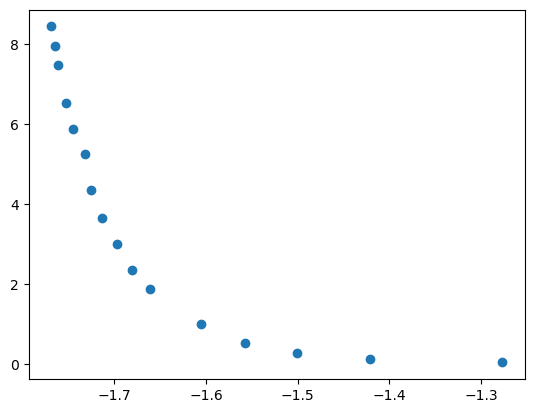

In [11]:
y = y.drop(0)
print(y)
xd = y['Time (seconds)']
yd = y['delta(V)']

plt.scatter(xd, yd)
plt.show()

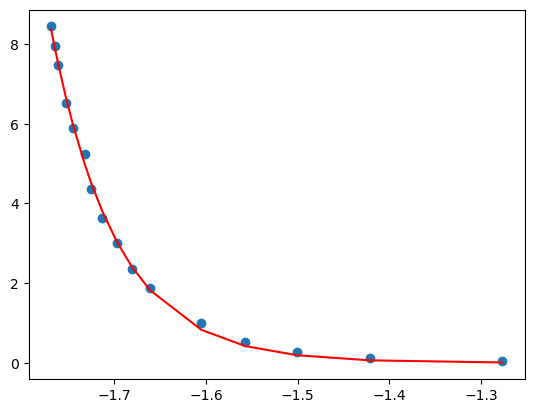

In [12]:
def exp_decay(x, A, x0, r):
    return A*np.exp(r*(x+x0))

popt, pcov = opt.curve_fit(exp_decay, xd, yd)

A_fit, x0_fit, r_fit = popt

# print(popt)

plt.scatter(xd, yd)
plt.plot(xd, exp_decay(xd, *popt), color='r')
plt.show()

In [21]:
z = pd.read_csv("charging.csv")
z

,Time (seconds),delta(V)
0,-1.788,0.16
1,-1.773,-6.24
2,-1.753,-5.76
3,-1.745,-5.12
4,-1.733,-4.24
5,-1.721,-3.52
6,-1.705,-2.80
7,-1.693,-2.32
8,-1.677,-1.92
9,-1.657,-1.36


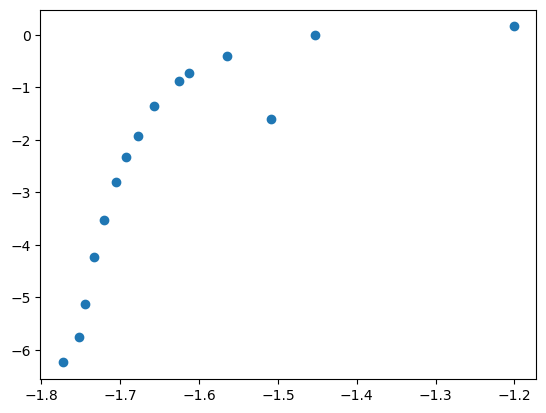

In [22]:
z = z.drop(0)
xdat = z['Time (seconds)']
ydat = z['delta(V)']

plt.scatter(xdat, ydat)
plt.show()

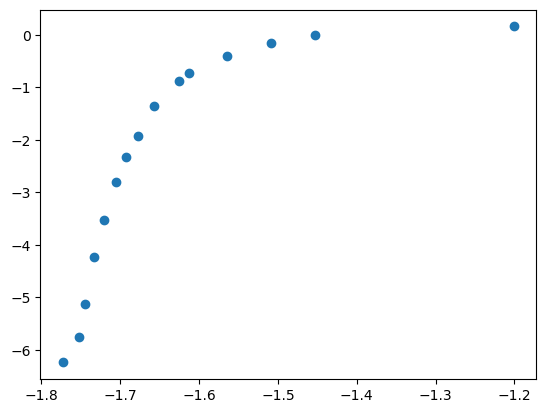

In [23]:
z['delta(V)'].loc[13] = -0.16

plt.scatter(xdat, ydat)
plt.show()

[  0.84145768   1.61028337 -12.85679108]


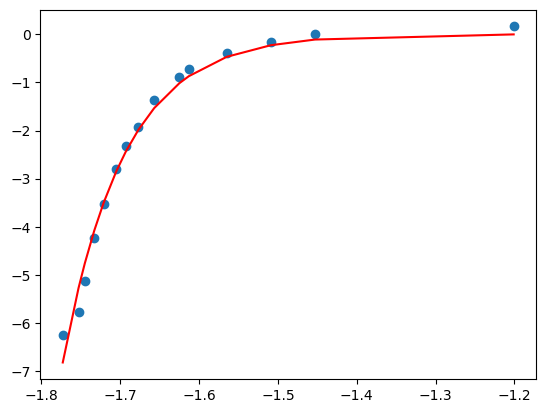

In [48]:
def exp_decay_1(x, A, x0, r):
    a = x + x0
    return -A*np.exp(r*a)

popt1, pcov1 = opt.curve_fit(exp_decay_1, xdat, ydat)

A_f, x0_f, r_f = popt1

print(popt1)

plt.scatter(xdat, ydat)
plt.plot(xdat, exp_decay(xdat, -A_f, x0_f, r_f), color='r')
plt.show()